<small>*Notebook auto-generated from [``altair/examples/json/bar_grouped_horizontal.vl.json``](../../altair/examples/json/bar_grouped_horizontal.vl.json)*</small>

# Altair Example: Bar Grouped Horizontal

--



In [1]:
# Uncomment and run these two lines to enable rendering in JupyterLab/nteract
# from altair import enable_mime_rendering
# enable_mime_rendering()

## Load Dataset
The data comes in the form of a Pandas Dataframe:

In [2]:
from altair import load_dataset
data = load_dataset("population")
data.head()

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850
3,5,1359668,2,1850
4,10,1260099,1,1850


## Define Altair Specification

In [3]:
from altair import *  # Import the altair API

chart = Chart(data).mark_bar().encode(
    color=Color('gender:N',
        scale=Scale(
            range=['#EA98D2', '#659CCA'],
        ),
    ),
    row=Row('age:O',
        axis=Axis(
            axisWidth=1.0,
            offset=-8.0,
            orient='left',
        ),
        scale=Scale(
            padding=4.0,
        ),
    ),
    x=X('sum(people):Q',
        axis=Axis(
            grid=False,
            title='population',
        ),
    ),
    y=Y('gender:N',
        axis=False,
        scale=Scale(
            bandSize=6.0,
        ),
    ),
).transform_data(
    calculate=[Formula(
            expr='datum.sex == 2 ? "Female" : "Male"',
            field='gender',
        )],
    filter='datum.year == 2000',
).configure_facet_cell(
    strokeWidth=0.0,
)

chart.max_rows = len(data)  # Altair 1.2.1 has a max_rows of 500 by default

IPython rich display will invoke Vega-Lite:

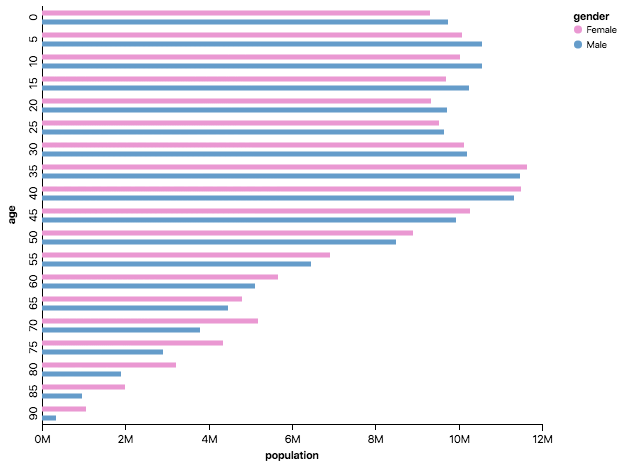

In [4]:
chart

## Output Vega-Lite Specification

Generate JSON dict, leaving data out:

In [5]:
chart.to_dict(data=False)

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'config': {'facet': {'cell': {'strokeWidth': 0.0}}},
 'encoding': {'color': {'field': 'gender',
   'scale': {'range': ['#EA98D2', '#659CCA']},
   'type': 'nominal'},
  'row': {'axis': {'axisWidth': 1.0, 'offset': -8.0, 'orient': 'left'},
   'field': 'age',
   'scale': {'padding': 4.0},
   'type': 'ordinal'},
  'x': {'aggregate': 'sum',
   'axis': {'grid': False, 'title': 'population'},
   'field': 'people',
   'type': 'quantitative'},
  'y': {'axis': False,
   'field': 'gender',
   'scale': {'bandSize': 6.0},
   'type': 'nominal'}},
 'mark': 'bar',
 'transform': {'calculate': [{'expr': 'datum.sex == 2 ? "Female" : "Male"',
    'field': 'gender'}],
  'filter': 'datum.year == 2000'}}